In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
data_folder = "/content/drive/MyDrive/data_flowdesk/data/"
!ls $data_folder

asset_details.csv  train.csv


In [3]:
import pandas as pd
import numpy as np
from datetime import datetime
from tqdm import tqdm
import matplotlib.pyplot as plt

In [4]:
crypto_df = pd.read_csv(data_folder + 'train.csv')
crypto_df['timestamp'] = pd.to_datetime(crypto_df['timestamp'], unit='s')

In [5]:
crypto_df

,timestamp,Asset_ID,Count,Open,High,Low,Close,Volume,VWAP,Target
0,2018-01-01 00:01:00,2,40.0,2376.580000,2399.500000,2357.140000,2374.590000,1.923301e+01,2373.116392,-0.004218
1,2018-01-01 00:01:00,0,5.0,8.530000,8.530000,8.530000,8.530000,7.838000e+01,8.530000,-0.014399
2,2018-01-01 00:01:00,1,229.0,13835.194000,14013.800000,13666.110000,13850.176000,3.155006e+01,13827.062093,-0.014643
3,2018-01-01 00:01:00,5,32.0,7.659600,7.659600,7.656700,7.657600,6.626713e+03,7.657713,-0.013922
4,2018-01-01 00:01:00,7,5.0,25.920000,25.920000,25.874000,25.877000,1.210873e+02,25.891363,-0.008264
...,...,...,...,...,...,...,...,...,...,...
24236801,2021-09-21 00:00:00,9,775.0,157.181571,157.250000,156.700000,156.943857,4.663725e+03,156.994319,NaN
24236802,2021-09-21 00:00:00,10,34.0,2437.065067,2438.000000,2430.226900,2432.907467,3.975460e+00,2434.818747,NaN
24236803,2021-09-21 00:00:00,13,380.0,0.091390,0.091527,0.091260,0.091349,2.193732e+06,0.091388,NaN
24236804,2021-09-21 00:00:00,12,177.0,0.282168,0.282438,0.281842,0.282051,1.828508e+05,0.282134,NaN


In [6]:
# Fill NaN values with np.inf or -np.inf
crypto_df.replace([np.inf, -np.inf], np.nan, inplace=True)

In [7]:
crypto_df = crypto_df.pivot_table(index=['timestamp'], columns = ["Asset_ID"]).reset_index()
crypto_df.fillna(method='ffill', inplace=True)

In [8]:
crypto_df.columns = [f'{col[0]}_{col[1]}' if isinstance(col[1], int) else col[0] for col in crypto_df.columns]
print(crypto_df)

                  timestamp   Close_0       Close_1      Close_2   Close_3  \
0       2018-01-01 00:01:00    8.5300  13850.176000  2374.590000       NaN   
1       2018-01-01 00:02:00    8.5145  13828.102000  2372.286667       NaN   
2       2018-01-01 00:03:00    8.4848  13801.314000  2372.063333       NaN   
3       2018-01-01 00:04:00    8.5009  13768.040000  2370.566667       NaN   
4       2018-01-01 00:05:00    8.4560  13724.914000  2370.173333       NaN   
...                     ...       ...           ...          ...       ...   
1956777 2021-09-20 23:56:00  362.9180  42899.012857   541.902000  2.067367   
1956778 2021-09-20 23:57:00  362.2000  42860.005714   538.690000  2.066106   
1956779 2021-09-20 23:58:00  361.8580  42827.020000   538.775000  2.064901   
1956780 2021-09-20 23:59:00  364.1145  43017.277143   542.512500  2.080337   
1956781 2021-09-21 00:00:00  363.7575  43002.505000   541.045000  2.079269   

          Close_4   Close_5      Close_6    Close_7  Close_8  .

In [9]:
# crypto_df.dropna(inplace=True)
crypto_df.fillna(0, inplace=True)

# Only keeping the moment where we have data for all assets.
# By doing so, we only keep 1 million rows instead of 2 million rows
# another possibility is to just replace by 0...

In [10]:
crypto_df

,timestamp,Close_0,Close_1,Close_2,Close_3,Close_4,Close_5,Close_6,Close_7,Close_8,...,Volume_4,Volume_5,Volume_6,Volume_7,Volume_8,Volume_9,Volume_10,Volume_11,Volume_12,Volume_13
0,2018-01-01 00:01:00,8.5300,13850.176000,2374.590000,0.000000,0.000000,7.657600,738.507500,25.877000,0.00000,...,0.000000e+00,6626.713370,335.987856,121.087310,0.0000,411.896642,0.000000,6.635710,0.000000,0.000000e+00
1,2018-01-01 00:02:00,8.5145,13828.102000,2372.286667,0.000000,0.000000,7.656700,738.260000,25.897000,0.00000,...,0.000000e+00,3277.475494,232.793141,1.468019,0.0000,3640.502706,0.000000,0.349420,0.000000,0.000000e+00
2,2018-01-01 00:03:00,8.4848,13801.314000,2372.063333,0.000000,0.000000,7.651200,737.502500,26.469500,0.00000,...,0.000000e+00,5623.557585,174.138031,76.163922,0.0000,328.350286,0.000000,1.189553,0.000000,0.000000e+00
3,2018-01-01 00:04:00,8.5009,13768.040000,2370.566667,0.000000,0.000000,7.635800,737.102500,26.449500,0.00000,...,0.000000e+00,1696.632459,165.383926,408.774848,0.0000,507.405579,0.000000,1.512079,0.000000,0.000000e+00
4,2018-01-01 00:05:00,8.4560,13724.914000,2370.173333,0.000000,0.000000,7.610000,735.705000,26.437000,0.00000,...,0.000000e+00,2268.362218,193.078039,529.337600,0.0000,1035.671830,0.000000,11.997972,0.000000,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1956777,2021-09-20 23:56:00,362.9180,42899.012857,541.902000,2.067367,0.207445,4.188017,2964.711429,49.082117,1.28045,...,1.895146e+06,27811.498394,751.256906,3300.202811,12147.3921,1361.041737,0.908325,114.310820,142533.884179,2.613704e+06
1956778,2021-09-20 23:57:00,362.2000,42860.005714,538.690000,2.066106,0.206920,4.179167,2960.845714,48.878480,1.27695,...,1.059219e+06,27641.893811,729.113672,789.899418,21186.7339,695.378065,1.070306,19.751763,152181.736233,4.991573e+06
1956779,2021-09-20 23:58:00,361.8580,42827.020000,538.775000,2.064901,0.206797,4.175733,2957.398571,48.826767,1.27500,...,4.201725e+05,18268.802763,807.935362,574.742717,8688.6624,1249.620035,8.953943,123.418300,92322.353887,3.699102e+06
1956780,2021-09-20 23:59:00,364.1145,43017.277143,542.512500,2.080337,0.208621,4.198733,2977.190000,49.078275,1.28455,...,2.583981e+06,77993.603539,1723.473979,3269.240163,11314.2341,2053.657529,6.107466,115.242365,681270.709717,3.241507e+06


In [11]:
asset_details = pd.read_csv(data_folder + 'asset_details.csv')

In [12]:
asset_details.sort_values(by='Asset_ID')

,Asset_ID,Weight,Asset_Name
1,0,4.304065,Binance Coin
2,1,6.779922,Bitcoin
0,2,2.397895,Bitcoin Cash
10,3,4.406719,Cardano
13,4,3.555348,Dogecoin
3,5,1.386294,EOS.IO
5,6,5.894403,Ethereum
4,7,2.079442,Ethereum Classic
11,8,1.098612,IOTA
6,9,2.397895,Litecoin


# Plots

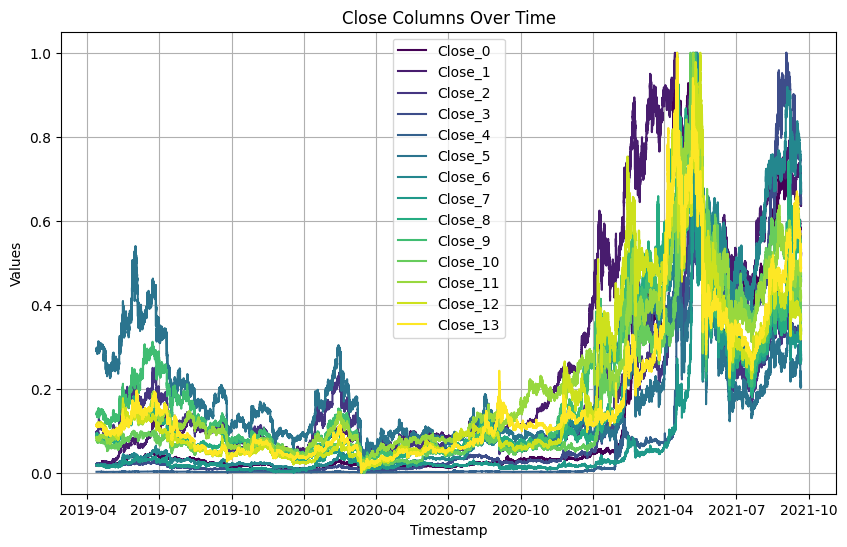

In [ ]:
import matplotlib.cm as cm
from sklearn.preprocessing import MinMaxScaler

# Filter columns that start with "Target"
target_columns = [col for col in crypto_df.columns if col.startswith('Close')]

# Create a MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

# Generate a colormap
colors = cm.viridis(np.linspace(0, 1, len(target_columns)))

# Plotting
plt.figure(figsize=(10, 6))

for color, column in zip(colors, target_columns):
    scaled_data = scaler.fit_transform(crypto_df[[column]])
    plt.plot(crypto_df['timestamp'], scaled_data, label=column, color=color)

plt.xlabel('Timestamp')
plt.ylabel('Values')
plt.title('Close Columns Over Time')
plt.legend()
plt.grid(True)
plt.show()

# Model

In [11]:
pip install tscv

In [12]:
import numpy as np
from tscv import GapRollForward

In [31]:
def get_feats(df, crypto_id):

    # df['upper_shadow'] = df['High'] - np.maximum(df['Close'], df['Open'])
    # df['lower_shadow'] = np.minimum(df['Close'], df['Open']) - df['Low']

    # average trading volume
    # df['avg_volume'] = df['Volume'] / df['Count']

    # average price
    # df['avg_price'] = (df['Open'] + df['High'] + df['Low'] + df['Close']) / 4

    # lagged features
    lags = [17]

    for crypto in range(14):
      for lag in lags:
        df['Target_' + str(crypto) + 'lag' + str(lag)] = df['Target_' + str(crypto)].shift(lag, fill_value=0)

    #lags = [1, 5, 20]
    #for crypto in range(14):
    #  for lag in lags:
    #    df['Close_' + str(crypto) + 'lag' + str(lag)] = df['Close_' + str(crypto)].shift(lag, fill_value=0)
        ## df['Close' + 'ma_' + str(lag)] = df['Close'].rolling(window = lag, min_periods = 1).mean()

    df['minute'] = df['timestamp'].dt.minute
    df['hour'] = df['timestamp'].dt.hour
    df['dayofweek'] = df['timestamp'].dt.dayofweek
    #df['month'] = df['timestamp'].dt.month
    #df['year'] = df['timestamp'].dt.year
    #df['dayofyear'] = df['timestamp'].dt.dayofyear
    #df['dayofmonth'] = df['timestamp'].dt.day
    #df['weekofyear'] = df['timestamp'].dt.isocalendar().week


    timestamp = df['timestamp']
    target = df['Target_' + str(crypto_id)]
    # Generate the list of columns to exclude
    exclude_columns = [f'Target_{crypto}' for crypto in range(14)] + ['timestamp']
    # Select columns that are not in the exclude list
    features = df[[col for col in df.columns if col not in exclude_columns]]

    return timestamp, features, target

In [27]:
# gap siz must be > 16, ideally > last lag value

tscv = GapRollForward(min_train_size=16*4*24*30, max_train_size=16*4*24*30,
                    min_test_size =16*4*24*30, max_test_size=16*4*24*30,
                    gap_size=500, roll_size= 16*4*24*35)

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV

# implement basic ML baseline (one per asset)
lr = LinearRegression()
rcv = RidgeCV()

In [29]:
from sklearn.linear_model import SGDRegressor
sgd = SGDRegressor()

In [32]:
timestamp, features, target = get_feats(crypto_df, 1)
# del crypto_df

In [35]:
import lightgbm as lgb
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
from sklearn.metrics import mean_squared_error

lgb = lgb.LGBMRegressor(num_leaves = 20)

models = []
corrcoef_train = []
mse_train = []
corrcoef_test = []
mse_test = []

for train_index, test_index in tqdm(tscv.split(timestamp)):
  X_train = features.iloc[train_index]
  y_train = target.iloc[train_index]

  X_test = features.iloc[test_index]
  y_test = target.iloc[test_index]

  X_train = scaler.fit_transform(X_train)
  X_test = scaler.transform(X_test)

  model = lr
  model.fit(X_train,y_train)
  models.append(model)

  y_predict_train = model.predict(X_train)
  y_predict_test = model.predict(X_test)

  corrcoef_train.append(np.corrcoef(y_predict_train, y_train)[0,1])
  mse_train.append(mean_squared_error(y_predict_train, y_train))
  corrcoef_test.append(np.corrcoef(y_predict_test, y_test)[0,1])
  mse_test.append(mean_squared_error(y_predict_test, y_test))
  print('Score for train ', train_index.min(), train_index.max(),": ", f"{np.corrcoef(y_predict_train, y_train)[0,1]:.5f}")
  print('Score for train ', len(train_index), ": ", f"{mean_squared_error(y_predict_train, y_train)}")
  print('Score for test ',test_index.min(), test_index.max(),": ", f"{np.corrcoef(y_predict_test, y_test)[0,1]:.5f}")
  print('Score for test ',len(test_index),": ", f"{mean_squared_error(y_predict_test, y_test)}")
  print("\n")

1it [00:01,  1.56s/it]

Score for train  0 46079 :  0.15798
Score for train  46080 :  1.2489699321919328e-05
Score for test  46580 92659 :  -0.00370
Score for test  46080 :  3.0588469980987085e+19




2it [00:03,  1.50s/it]

Score for train  53760 99839 :  0.22807
Score for train  46080 :  3.373989316271239e-06
Score for test  100340 146419 :  0.00523
Score for test  46080 :  1.3451082403837699e-05




3it [00:05,  1.94s/it]

Score for train  107520 153599 :  0.17950
Score for train  46080 :  2.6494708348905e-06
Score for test  154100 200179 :  0.00549
Score for test  46080 :  1.405742205236875e+23




4it [00:08,  2.19s/it]

Score for train  161280 207359 :  0.22040
Score for train  46080 :  1.8854661710740082e-06
Score for test  207860 253939 :  0.01449
Score for test  46080 :  2.2749727839985297e-06




5it [00:10,  2.16s/it]

Score for train  215040 261119 :  0.16940
Score for train  46080 :  1.592994689452896e-06
Score for test  261620 307699 :  -0.00672
Score for test  46080 :  7.1998524817123574e-06




6it [00:12,  2.21s/it]

Score for train  268800 314879 :  0.20178
Score for train  46080 :  1.8373591365686185e-06
Score for test  315380 361459 :  0.04615
Score for test  46080 :  2.390599304519509e-06




7it [00:14,  2.07s/it]

Score for train  322560 368639 :  0.24063
Score for train  46080 :  1.8854742685520595e-06
Score for test  369140 415219 :  -0.01948
Score for test  46080 :  2.8024904573816073e-06




8it [00:15,  1.75s/it]

Score for train  376320 422399 :  0.14966
Score for train  46080 :  3.5669017333032098e-06
Score for test  422900 468979 :  -0.03141
Score for test  46080 :  7.091147282571648e-06




9it [00:16,  1.52s/it]

Score for train  430080 476159 :  0.16505
Score for train  46080 :  5.9914609016427876e-06
Score for test  476660 522739 :  0.02699
Score for test  46080 :  5.530765772380304e-06




10it [00:17,  1.36s/it]

Score for train  483840 529919 :  0.16381
Score for train  46080 :  3.7669589001402298e-06
Score for test  530420 576499 :  0.02813
Score for test  46080 :  3.7763353812115614e-06




11it [00:18,  1.25s/it]

Score for train  537600 583679 :  0.13605
Score for train  46080 :  2.520061226992803e-06
Score for test  584180 630259 :  0.02973
Score for test  46080 :  3.584840166728085e-06




12it [00:19,  1.19s/it]

Score for train  591360 637439 :  0.12064
Score for train  46080 :  3.058155899945647e-06
Score for test  637940 684019 :  0.02488
Score for test  46080 :  9.435400769672784e-06




13it [00:20,  1.15s/it]

Score for train  645120 691199 :  0.25193
Score for train  46080 :  3.236213712416036e-06
Score for test  691700 737779 :  0.04066
Score for test  46080 :  1.7053319455270492e-05




14it [00:21,  1.19s/it]

Score for train  698880 744959 :  0.18886
Score for train  46080 :  6.375288537349202e-06
Score for test  745460 791539 :  -0.01207
Score for test  46080 :  1.4221740083241905e-05




15it [00:23,  1.28s/it]

Score for train  752640 798719 :  0.19625
Score for train  46080 :  7.152751984880944e-06
Score for test  799220 845299 :  0.04417
Score for test  46080 :  1.1632529437079418e-05




16it [00:24,  1.41s/it]

Score for train  806400 852479 :  0.18107
Score for train  46080 :  3.1512040758156432e-06
Score for test  852980 899059 :  0.01787
Score for test  46080 :  2.5900175282319056e-06




17it [00:26,  1.38s/it]

Score for train  860160 906239 :  0.20930
Score for train  46080 :  1.7384962082342723e-06
Score for test  906740 952819 :  -0.02122
Score for test  46080 :  2.6157985393464592e-06




18it [00:27,  1.27s/it]

Score for train  913920 959999 :  0.24722
Score for train  46080 :  6.730084520050742e-06
Score for test  960500 1006579 :  0.01318
Score for test  46080 :  4.037594926068277e-06




19it [00:28,  1.20s/it]

Score for train  967680 1013759 :  0.17136
Score for train  46080 :  1.42227189164968e-06
Score for test  1014260 1060339 :  -0.00049
Score for test  46080 :  2.3052524118697e-06




20it [00:29,  1.15s/it]

Score for train  1021440 1067519 :  0.14382
Score for train  46080 :  2.0622045768443373e-06
Score for test  1068020 1114099 :  0.02089
Score for test  46080 :  6.038929999323441e-06




21it [00:30,  1.12s/it]

Score for train  1075200 1121279 :  0.18855
Score for train  46080 :  1.5565933574807846e-06
Score for test  1121780 1167859 :  0.01418
Score for test  46080 :  6.7201579503098825e-06




22it [00:31,  1.09s/it]

Score for train  1128960 1175039 :  0.26371
Score for train  46080 :  5.104062556892509e-06
Score for test  1175540 1221619 :  0.00024
Score for test  46080 :  3.2222692896007525e-06




23it [00:33,  1.28s/it]

Score for train  1182720 1228799 :  0.20819
Score for train  46080 :  1.5624174709894123e-06
Score for test  1229300 1275379 :  0.01494
Score for test  46080 :  4.679646542283229e-06




24it [00:34,  1.38s/it]

Score for train  1236480 1282559 :  0.19433
Score for train  46080 :  2.494749929515982e-06
Score for test  1283060 1329139 :  -0.00384
Score for test  46080 :  6.339372373381068e-06




25it [00:36,  1.52s/it]

Score for train  1290240 1336319 :  0.17480
Score for train  46080 :  6.800078131382371e-07
Score for test  1336820 1382899 :  0.02173
Score for test  46080 :  3.8286761988191526e-06




26it [00:38,  1.49s/it]

Score for train  1344000 1390079 :  0.18465
Score for train  46080 :  3.0270216398109767e-06
Score for test  1390580 1436659 :  0.00426
Score for test  46080 :  2.4148702694406083e-06




27it [00:39,  1.44s/it]

Score for train  1397760 1443839 :  0.17869
Score for train  46080 :  2.067166595168186e-06
Score for test  1444340 1490419 :  -0.01622
Score for test  46080 :  5.900230566555358e-06




28it [00:40,  1.43s/it]

Score for train  1451520 1497599 :  0.13652
Score for train  46080 :  2.2663435783333275e-06
Score for test  1498100 1544179 :  0.00079
Score for test  46080 :  7.192952452272465e-06




29it [00:42,  1.39s/it]

Score for train  1505280 1551359 :  0.18990
Score for train  46080 :  4.038477206004644e-06
Score for test  1551860 1597939 :  0.03992
Score for test  46080 :  4.4630715324035795e-05




30it [00:43,  1.29s/it]

Score for train  1559040 1605119 :  0.17764
Score for train  46080 :  1.0668772921127781e-05
Score for test  1605620 1651699 :  0.02285
Score for test  46080 :  0.00018751820416751248




31it [00:44,  1.21s/it]

Score for train  1612800 1658879 :  0.18142
Score for train  46080 :  1.6635775953026624e-05
Score for test  1659380 1705459 :  0.00878
Score for test  46080 :  6.085893685611295e-06




32it [00:45,  1.15s/it]

Score for train  1666560 1712639 :  0.15842
Score for train  46080 :  3.273495087675723e-06
Score for test  1713140 1759219 :  -0.02411
Score for test  46080 :  0.0005104199762314089




33it [00:46,  1.11s/it]

Score for train  1720320 1766399 :  0.18418
Score for train  46080 :  4.637405548099438e-06
Score for test  1766900 1812979 :  0.07247
Score for test  46080 :  1.7654929141907833e-05




34it [00:47,  1.08s/it]

Score for train  1774080 1820159 :  0.36005
Score for train  46080 :  6.474473614833153e-06
Score for test  1820660 1866739 :  0.01645
Score for test  46080 :  3.288718687409081e-06




35it [00:48,  1.38s/it]

Score for train  1827840 1873919 :  0.17826
Score for train  46080 :  2.011392829657297e-06
Score for test  1874420 1920499 :  0.02340
Score for test  46080 :  5.575003181429086e-06




corr train:  0.19091685743014697
corr test:  0.011960642717846658


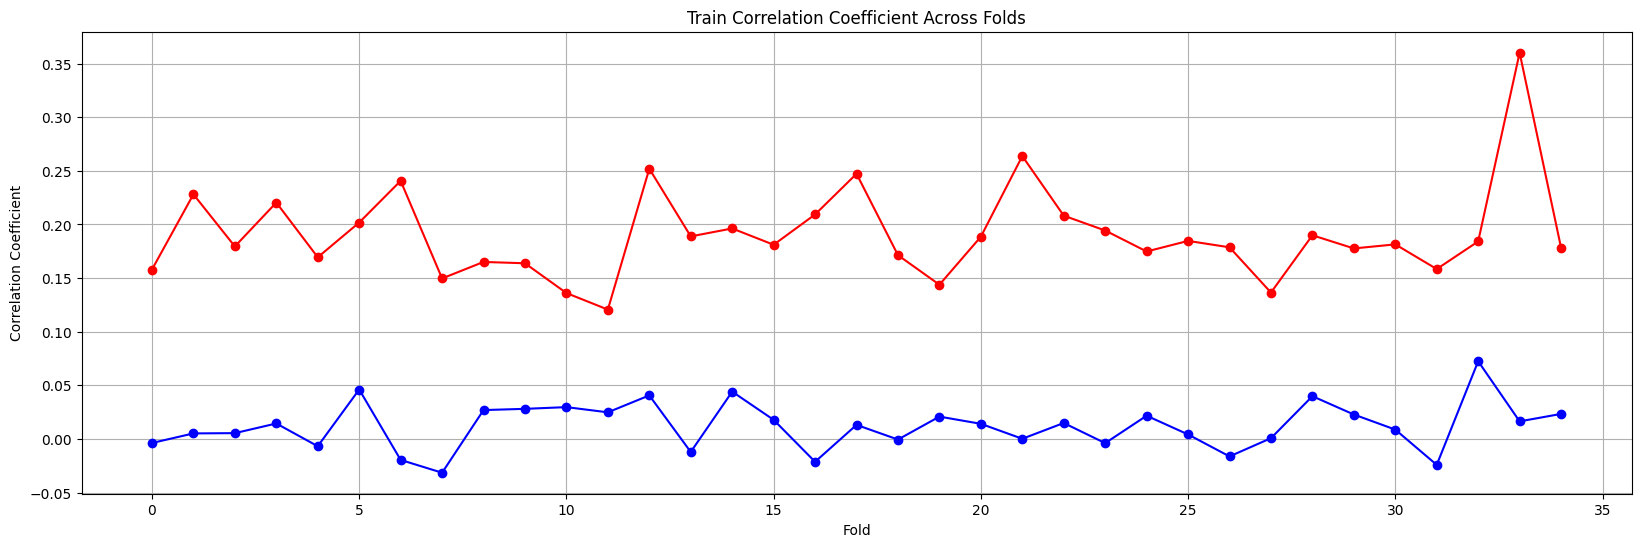

In [36]:
print("corr train: ", np.mean(corrcoef_train))
print("corr test: ", np.mean(corrcoef_test))

# Create a plot for Train Correlation Coefficient
plt.figure(figsize=(20, 6))
plt.plot(corrcoef_train, marker='o', linestyle='-', color='r')
plt.title('Train Correlation Coefficient Across Folds')
plt.xlabel('Fold')
plt.ylabel('Correlation Coefficient')
plt.grid(True)
plt.plot(corrcoef_test, marker='o', linestyle='-', color='b')
plt.show()

In [37]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = make_subplots()

fig.add_trace(
    go.Box(
        y= corrcoef_train,
        name = 'Train pcc'
    ))

fig.add_trace(
    go.Box(
        y= corrcoef_test,
        name = 'Test pcc'
    ))
fig.show()

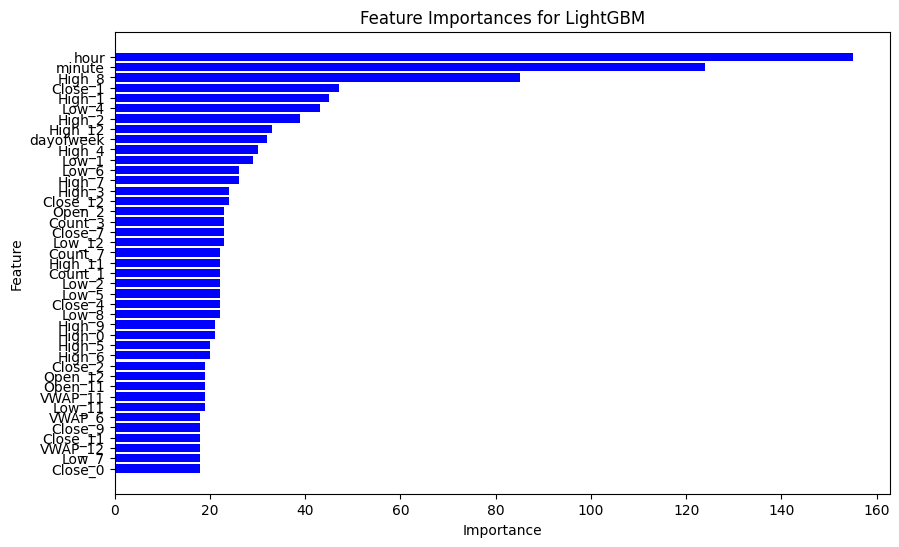

In [26]:
## Feature importance for LightGBM

# Get the feature importances
feature_importances = model.feature_importances_

# Create a DataFrame for better visualization
feature_importances_df = pd.DataFrame({
    'feature': features.columns,
    'importance': feature_importances
}).sort_values(by='importance', ascending=True)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importances_df['feature'][60:], feature_importances_df['importance'][60:], color='b', align='center')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances for LightGBM')
plt.show()

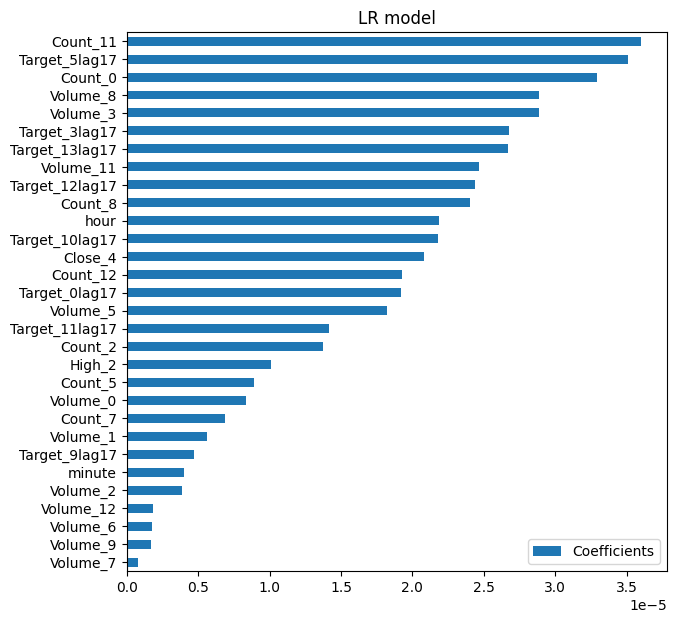

In [38]:
## Feature importance for LinearRegression

import matplotlib.pyplot as plt

coefs = pd.DataFrame(np.abs(models[2].coef_), columns=["Coefficients"], index= features.columns)
coefs = coefs.sort_values(by='Coefficients', ascending=True)[:30]
coefs.plot(kind="barh", figsize=(9, 7))
plt.title("LR model")
plt.axvline(x=0, color=".5")
plt.subplots_adjust(left=0.3)

# Prophet

In [ ]:
del crypto_df

In [ ]:
crypto_df = pd.read_csv(data_folder + 'train.csv')
crypto_df['timestamp'] = pd.to_datetime(crypto_df['timestamp'], unit='s')
# Fill NaN values with np.inf or -np.inf
crypto_df.replace([np.inf, -np.inf], np.nan, inplace=True)

In [ ]:
import pandas as pd
from prophet import Prophet

m = Prophet(changepoint_prior_scale=0.01)

data = c[crypto_df["Asset_ID"] == 1]
data = data[['timestamp','Close']]
data.rename(columns={"timestamp": "ds", "Close": "y"}, inplace=True)

data = data[data['ds']>'2018-01-01 23:40:00']
data = data.iloc[::60, :]

data.reset_index(drop=True, inplace=True)
data.dropna(inplace=True)
data

,ds,y
0,2018-01-01 23:41:00,13454.994000
1,2018-01-02 00:41:00,13868.130000
2,2018-01-02 01:41:00,13771.292000
3,2018-01-02 02:41:00,13540.680000
4,2018-01-02 03:41:00,13413.154000
...,...,...
32571,2021-09-20 18:47:00,43532.216303
32572,2021-09-20 19:47:00,43637.700000
32573,2021-09-20 20:47:00,43328.331429
32574,2021-09-20 21:47:00,43767.107143


In [ ]:
m.fit(data)

DEBUG:cmdstanpy:input tempfile: /tmp/tmpo6tpxbkw/1bgcz2do.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo6tpxbkw/ppojed9o.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=37059', 'data', 'file=/tmp/tmpo6tpxbkw/1bgcz2do.json', 'init=/tmp/tmpo6tpxbkw/ppojed9o.json', 'output', 'file=/tmp/tmpo6tpxbkw/prophet_model_1u4y13q/prophet_model-20240602204505.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
20:45:05 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
20:46:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
future = m.make_future_dataframe(periods=1, freq='min')
future.tail()

,ds
32572,2021-09-20 19:47:00
32573,2021-09-20 20:47:00
32574,2021-09-20 21:47:00
32575,2021-09-20 22:47:00
32576,2021-09-20 22:48:00


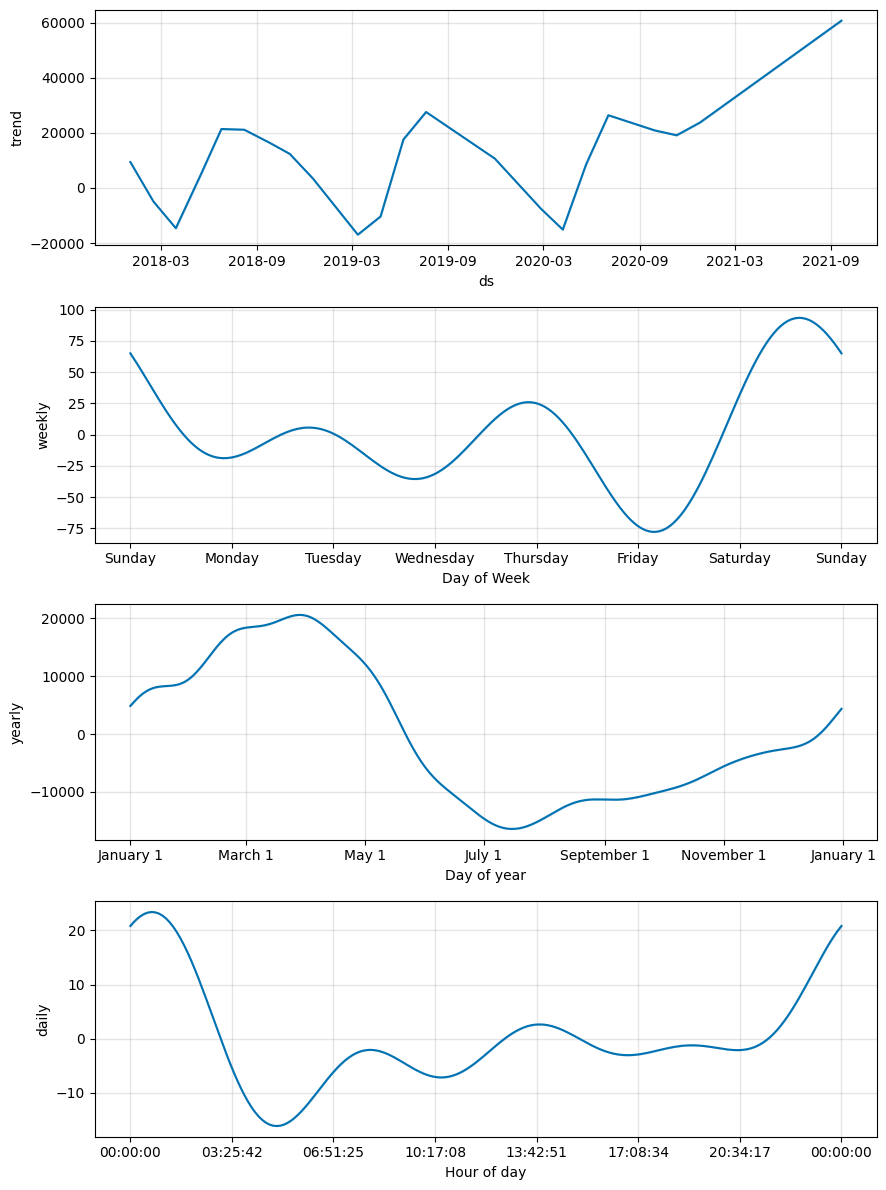

In [ ]:
fcst = m.predict(future)

fig2 = m.plot_components(fcst)